# **Name - Adarsh Raj**

# **A21001**

First relevant libraries import actions will be done and then we will use some basic pandas commands to explore the different columns & dataset on a preliminary basis.

In [1]:
#Importing relevant Libraries required for dataset analysis
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Reading excel file from mounted google drive
import io
df = pd.read_excel('/content/drive/MyDrive/Classroom/A21 : STS PGPDS Fall/DATASET CIS.xlsx')

In [6]:
#Checking shape of data.
df.shape

(50, 6)

We get to know that dataset comprises of 50 rows and 6 columns.



In [7]:
#Checking first 5 rows of dataset
df.head()

,Status,Credit.Grade,Amount,Age,Borrower.Rate,Debt.To.Income.Ratio
0,Current,C,5000,4,0.1500,0.040
1,Current,HR,1900,6,0.2650,0.020
2,Current,HR,1000,3,0.1500,0.020
3,Current,HR,1000,5,0.2900,0.020
4,Current,AA,2550,8,0.0795,0.033


In [8]:
#Checking last 5 rows of dataset
df.tail()

,Status,Credit.Grade,Amount,Age,Borrower.Rate,Debt.To.Income.Ratio
45,Current,AA,3000,3,0.0800,0.02
46,Current,AA,1000,3,0.0700,0.04
47,Late,HR,1050,7,0.2875,0.03
48,Current,E,1000,1,0.2050,0.03
49,Current,B,2400,3,0.0850,0.04


In [9]:
#To check all the column heading of the dataset
df.columns

Index(['Status', 'Credit.Grade', 'Amount', 'Age', 'Borrower.Rate',
       'Debt.To.Income.Ratio'],
      dtype='object')

In [10]:
#Checking basic statistical values of the dataset
df.describe()

,Amount,Age,Borrower.Rate,Debt.To.Income.Ratio
count,50.000000,50.000000,50.000000,50.000000
mean,2005.420000,5.340000,0.169364,0.021920
std,1331.252534,2.832825,0.079238,0.010089
min,1000.000000,1.000000,0.050000,0.000000
25%,1000.000000,3.000000,0.085000,0.013000
50%,1600.000000,6.000000,0.183750,0.020000
75%,2537.500000,8.000000,0.237500,0.030000
max,7500.000000,10.000000,0.290000,0.040000


One important observation we can make from the above statistical description is that the minimum value for "Debt.To.Income.Ratio" is zero. For a particular value to be zero in this column, either the 'Amount' (if assumed same as Debt) has to be zero or the Income has to be infinite. But we know that the Income can not be infinite so that leaves us with one option, i.e. the 'Amount' has to be zero. In the below code we will try and check for particular row(s) where "Debt.To.Income.Ratio" is zero.

In [11]:
#Checking rows with zero value for "Debt.To.Income.Ratio" column
print(df.loc[df['Debt.To.Income.Ratio'] == 0])

     Status Credit.Grade  Amount  Age  Borrower.Rate  Debt.To.Income.Ratio
20  Current           AA    2550    6           0.05                   0.0


From the help of above code we can see that there is one entry where the "Debt.To.Income.Ratio" is zero. And as per the reasons stated in above paragraph, the "Amount" column value has to be zero but we see that the value for this row is 2550 which doesn't make sense w.r.t our previous analogy. Thus, we have one data row which demonstrates anomaly. We could either drop this data row or replace the "Debt.To.Income.Ratio" for this row with the mean of the "Debt.To.Income.Ratio" column(as mean and median are close for this data column, it signifies smaller skewness). For our case, we are replacing the zero value with the mean value of the column.

In [12]:
#Checking skewness for the "Debt.To.Income.Ratio" column
from scipy.stats import skew
skew_debt_income_ratio = df['Debt.To.Income.Ratio']

print('Skewness for "Debt.To.Income.Ratio" Column is : %3.2f' % skew(skew_debt_income_ratio))

Skewness for "Debt.To.Income.Ratio" Column is : 0.14


With the above value of skewness for "Debt.To.Income.Ratio" column, we see that our earlier visual reasoning that skewness is small holds true. We can go ahead and replace the zero value with mean now, as said previously.

In [13]:
#Replacing the zero value with the mean of the column, as said above
df['Debt.To.Income.Ratio'].replace(to_replace=0.0, value=0.0219, inplace=True)
print(df.loc[df['Debt.To.Income.Ratio'] == 0.0219])

     Status Credit.Grade  Amount  Age  Borrower.Rate  Debt.To.Income.Ratio
20  Current           AA    2550    6           0.05                0.0219


For index number 20 above, we can see that the value has been replaced now. 

Now, let's use describe function to check the new statistical descriptions of "Debt.To.Income.Ratio".

In [14]:
#checking new statistical description of the "Debt.To.Income.Ratio" column
df['Debt.To.Income.Ratio'].describe()

count    50.000000
mean      0.022358
std       0.009581
min       0.010000
25%       0.013500
50%       0.020000
75%       0.030000
max       0.040000
Name: Debt.To.Income.Ratio, dtype: float64

In [15]:
#Checking new skewness for the Debt.To.Income.Ratio column
from scipy.stats import skew
skew_debt_income_ratio_new = df['Debt.To.Income.Ratio']

print('New Skewness for "Debt.To.Income.Ratio" Column is : %3.2f' % skew(skew_debt_income_ratio_new))

New Skewness for "Debt.To.Income.Ratio" Column is : 0.27


We see that our skewness has increased after modifying the data but it is still under tolerable limits and it has helped us deal with anomaly.

## **Univariate Analysis**

---



### **Categorical Values Analysis**

Current    47
Late        2
Default     1
Name: Status, dtype: int64

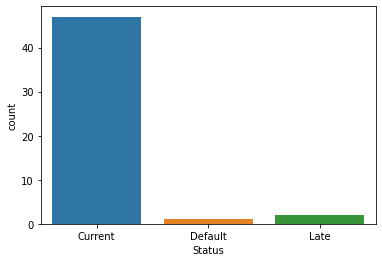

In [16]:
#To check unique entries under "Status" column, their respective counts and plot bar graph for the same
sns.countplot(x=df['Status'], saturation = 0.8)
df['Status'].value_counts()

With the help of above, we can see that the Status : "Current" has the maximum count, which is 47 out of 50 data points. We can infer that the data set is heavily biased towards "Current" status compared to "Default" and "Late".

HR    20
AA    11
E      5
A      5
B      3
C      2
NC     2
D      2
Name: Credit.Grade, dtype: int64

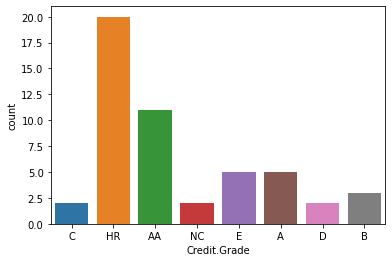

In [17]:
#To check unique entries under "Credit.Grade" column, their respective counts and plot bar graph for the same
sns.countplot(x=df['Credit.Grade'], saturation = 0.8)
df['Credit.Grade'].value_counts()

With the help of above, we can see that the majority of count is occupied by "Credit.Grade" - "HR" & "AA", with total count of 31 out of 50. Apart from these 2, the count is relatively fairly distributed among other entries of "Credit.Grade" column.

Before moving ahead to analysis of Numerical values, lets try to plot Pearson coefficient values with the help of correlaton matrix. This will help us try to get any correlation, if there, between two numerical value columns.

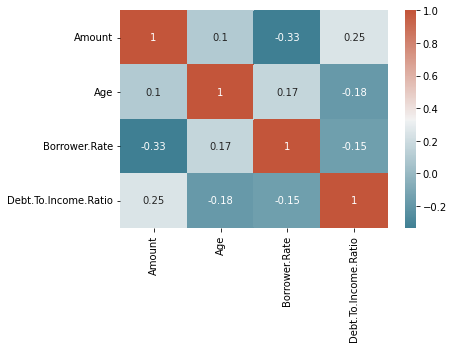

In [18]:
#To check correlation coefficient values between different numerical values columns
corrmat = df.corr()
sns.heatmap(corrmat, xticklabels=corrmat.columns, yticklabels=corrmat.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Above, we have the correlation matrix which provides the numerical correlation between different numerical values of the dataset. The dataset we have with us tells us about the Loan/Debt summary(in brief) and in such scenario it's best to have correlation between important parameters like lending rate, loan/debt amount and tenure of loan/debt.

We can see that the correlation value for "Amount" & "Borrower.Rate" is negative which provides us information that, in general, when we increase the amount, the borrower rate decreases.
On contrary, there is a positive correlation between "Amount" & "Age", which rightly so demonstrates that, in general, higher loan/debt amount gets paid back to the lending firm over a longer tenure.

### **Numerical Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      50.000000
mean     2005.420000
std      1331.252534
min      1000.000000
25%      1000.000000
50%      1600.000000
75%      2537.500000
max      7500.000000
Name: Amount, dtype: float64

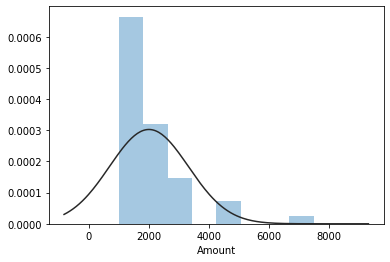

In [19]:
sns.distplot(df['Amount'], kde=False, fit=norm);
df['Amount'].describe()

In [20]:
from scipy.stats import skew
skewness_amount = df['Amount']

print('Skewness of Amount column dataset is : ', skew(skewness_amount))

Skewness of Amount column dataset is :  2.024800943849104


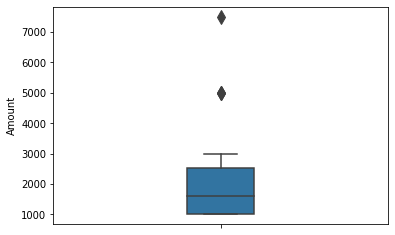

In [21]:
sns.boxplot(y=df['Amount'], width=0.2, whis=1, fliersize=10)

With the help of above graphs we can see that the "Amount" column is -
1. Positive skewed with skewness value of 2.02(significant difference between median and mean)
2. Outlier data are also present
3. Most of the data point is concentrated around 1000-2500 value region 

Apart from the above, we can also note one interesting observation that the min value and 25% value(Q1) are the same for this column. As minimum is calculated with the formula, min = Q1 - IQR, and by the use of this formula, min value comes to be negative which doesn't make sense for this column. Hence, for the min, Q1 value has been used and that is the reason why we don't have any whisker on the lower half.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    50.000000
mean      5.340000
std       2.832825
min       1.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Age, dtype: float64

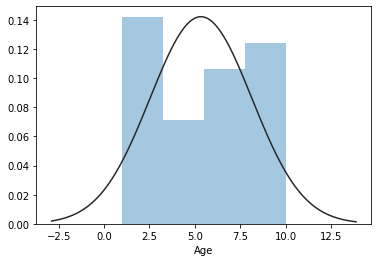

In [22]:
sns.distplot(df['Age'], kde=False, fit=norm)
df['Age'].describe()

In [23]:
from scipy.stats import skew
skewness_age = df['Age']

print('Skewness of "Age" column dataset is : ', skew(skewness_age))

Skewness of "Age" column dataset is :  -0.09979759426158794


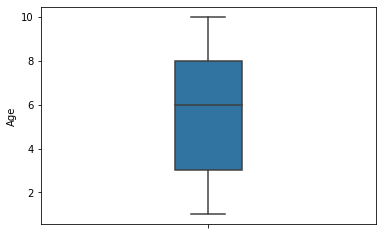

In [24]:
sns.boxplot(y=df['Age'], width=0.2, whis=1, fliersize=10)

With the help of above graphs for "Age" column, we can draw that -
1. It has quite a normal distribution with almost zero skewness and even spread throughout
2. There are no outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    50.000000
mean      0.169364
std       0.079238
min       0.050000
25%       0.085000
50%       0.183750
75%       0.237500
max       0.290000
Name: Borrower.Rate, dtype: float64

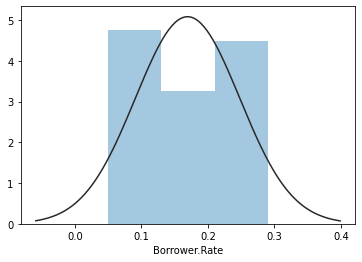

In [25]:
sns.distplot(df['Borrower.Rate'], kde=False, fit=norm)
df['Borrower.Rate'].describe()

In [26]:
from scipy.stats import skew
skewness_borrower_rate = df['Borrower.Rate']

print('Skewness of "Borrower.Rate" column dataset is : ', skew(skewness_borrower_rate))

Skewness of "Borrower.Rate" column dataset is :  0.007144457974670291


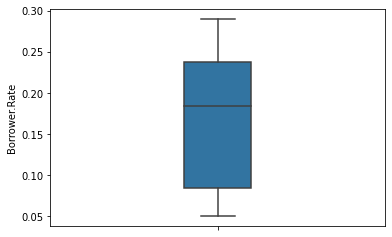

In [27]:
sns.boxplot(y=df['Borrower.Rate'], width=0.2, whis=1, fliersize=10)

With the help of above graphs for "Borrower.Rate" column, we can draw that -
1. It has quite a normal distribution with almost zero skewness and even spread throughout
2. There are no outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    50.000000
mean      0.022358
std       0.009581
min       0.010000
25%       0.013500
50%       0.020000
75%       0.030000
max       0.040000
Name: Debt.To.Income.Ratio, dtype: float64

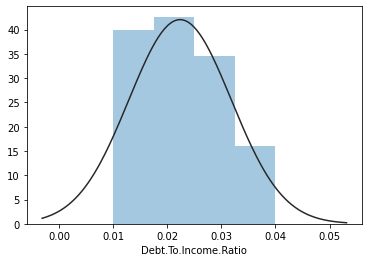

In [28]:
sns.distplot(df['Debt.To.Income.Ratio'], kde=False, fit=norm)
df['Debt.To.Income.Ratio'].describe()

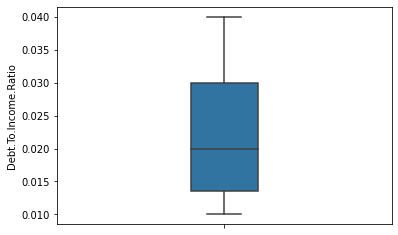

In [29]:
sns.boxplot(y=df['Debt.To.Income.Ratio'], width=0.2, whis=1, fliersize=10)

In [30]:
from scipy.stats import skew
skewness_debt_to_income_ratio = df['Debt.To.Income.Ratio']

print('Skewness of "Debt.To.Income.Ratio" column dataset is : ', skew(skewness_debt_to_income_ratio))

Skewness of "Debt.To.Income.Ratio" column dataset is :  0.2711250659606976


With the help of above graphs we can see that the "Debt.To.Income.Ratio" column -
1. is a bit positively skewed with skewness value of 0.27(little difference between median and mean)
2. have no outliers


## **Bivariate Analysis**

---



### **Numerical Values Analysis**

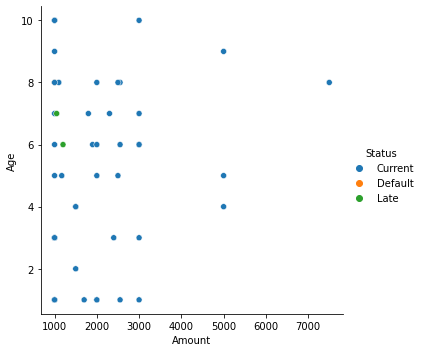

In [34]:
#scatter plot
sns.relplot(x='Amount', y='Age', hue='Status', data=df)

The above graph doesn't help us at all as the "Current" value for "Status" column are quite more in numbers in comparison to other entries. We'll try to leverage the help of "Credit.Grade" for next graph to understand the relationship between "Age" & "Amount".

Also, for further analysis, we won't be using that much "Status" column it is heavily biased towards "Current" entry and will not provide us any meaningful insight.

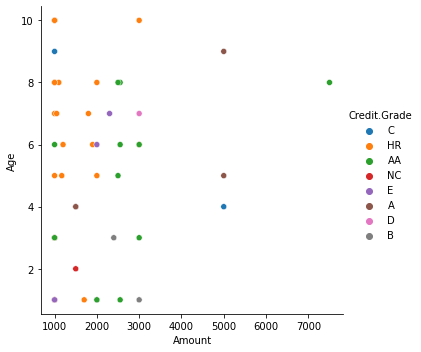

In [35]:
sns.relplot(x='Amount', y='Age', hue='Credit.Grade', data=df)

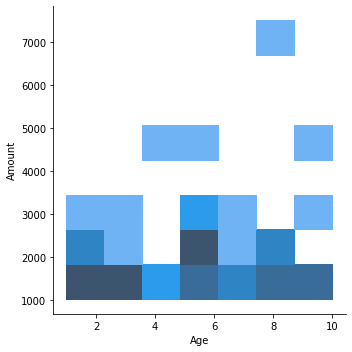

In [ ]:
sns.displot(y=df['Amount'], x=df['Age'])

From the above 2 graphs we can see that the most of the data points are present for Amount < 3000 and the Age for the same is fairly uniformly spread from 1 to 10. For the "Age", we can see that maximum data points corresponds to between 5 and 8 and that is signified with the help of heatmap above as the colors are more concentrated and darker in that region.

Only few data points corresponds to over Amount >= 5000 and infact no data point between 3000 & 5000. We are not able to get a proper understanding of "Credit.Grade" in this and we'll try to explore it more later.

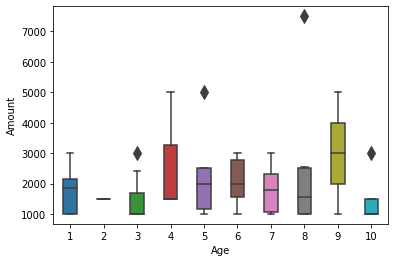

In [ ]:
sns.boxplot(y=df['Amount'], x=df['Age'], width=0.4, whis=1, fliersize=10)

With the help of above box plot for "Amount" across "Age" gives us the following key points -
1. Most of the data points for "Amount" across "Age" depicts great degree of skewness except for "Age" = 9, which demonstrates fairly normal distribution
2. For "Age" = 3, 5, 8 & 10; we have presenece of outlier and they are present above maximum categorical value0
3. No box plot for "Age" = 3 as we have only data point
4. More than half of the "Age" category has missing whiskers, which demonstrates that min/max value for the concerned "Age" groups equals their Q1/Q3 values respectively.

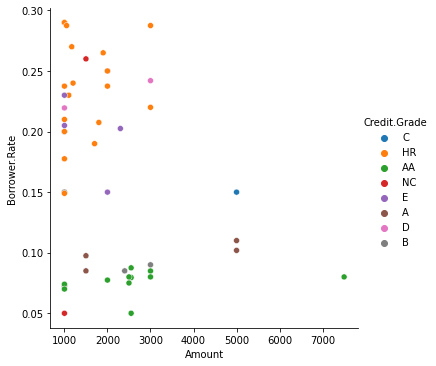

In [ ]:
sns.relplot(x='Amount', y='Borrower.Rate', hue='Credit.Grade', data=df)

The above graph gives us a beautiful depiction of "Borrower.Rate" across "Amount" differentiated with the help of "Credit.Grade". Following are the observations we can make from ab0ve -
1. More than half of data(largest chunk of data) is present in higher "Borrower.Rate" category i.e. above 0.15
2. Second largest chunk of data is concentrated in the region of "Borrower.Rate" = (0.05, 0.10), both included

Leveraging the help of "Credit.Grade" we can see -
1. "Credit.Grade - AA, A & B", is concentrated in the region of lower "Borrower.Rate"
2. High "Borrower.Rate" corresponds to "Credit.Grade - HR, E & D"

Thus, we can infer that, on a general note -- "Credit.Grade" of AA, A & B might denote better credit rating as the "Borrower.Rate" is low and "Credit.Grade" of HR, E & D might denote not-so-good credit rating as the "Borrower.Rate" for these credit grades are comparibly higher for same loan/debt amount.


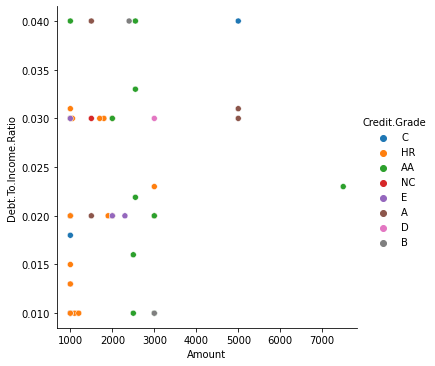

In [ ]:
sns.relplot(x='Amount', y='Debt.To.Income.Ratio', hue='Credit.Grade', data=df)

Plot of "Debt.To.Income.Ratio" across "Amount" is not able to provide us any concrete insight. Few discrete insights that we may get throught above is - 
1. HR "Credit.Grade" - for approximately same amount (~1000), Y value ranges from 0.01 to little above 0.03, which may infer that relatively higher income category people are also taking debt/loan of 1000
2. Same inferences can be drawn for AA "Credit.Grade" as the Y value is spread across the entire range

As said earlier, the above inferences can not to be taken as complete truth as we have only few dataset and for the dataset present the above holds true.

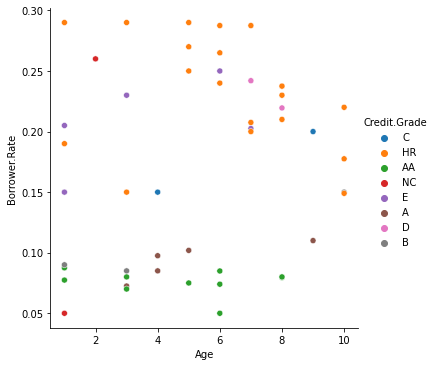

In [ ]:
sns.relplot(x='Age', y='Borrower.Rate', hue='Credit.Grade', data=df)

If we divide the above square graph area with the help of a diagonal running from top-left corner to bottom-right then, we see that fairly equal number of dataset belongs to both the resulting right-angled triangles. For now we'll name them upper & lower right-angled triangle.

Inferences we can draw from the above are -
1. Dataset present in the below right-angled triangle majorly belong to "Credit.Grade" - AA, A, B & C; which shows lower "Borrower.Rate" and thus better credit grade(from our previous inference)
2. Dataset present in the upper right-angled triangle majorly belong to "Credit.Grade" - D, E & HR; which shows higher "Borrower.Rate" and thus not-so-better credit grade(from our previous inference)
3. For "Credit.Grade" - HR, the "Borrower.Rate" decreases as the "Age" of the loan/debt increases which depicts real world scenario that when we opt for higher tenure of loan then lending/borrowing rate is generally low
4. We can not say the above to be true for "Credit.Grade" - AA, as the "Borrower.Rate" is uniformly the same for all "Age" values. This might show that the "Borrower.Rate" category of (0.05-0.1) might be the lending rate for AA "Credit.Grade" customers and this could be the lowest lending rate that are provided to customers having better credit grade

We can say that for "Credit.Grade" - E, relatively(visually) equal number of dataset belong to the upper and lower right-angled triangle. This can be explained with the fact that as the age of the loan/debt increases, the firm increases their lending/borrowing rate to the customers.

For "Credit.Grade" - NC, the dataset seems to be ambigous as it is present in both the extremes of "Borrower.Rate" for relatively same "Age"(1 & 2). So, for this "Credit.Grade" we will avoid commenting anything concrete or with confidence as we don't have enough data point. Same inference can be drawn for this "Credit.Grade" across different Bivariate analysis which includes "Credit.Grade".

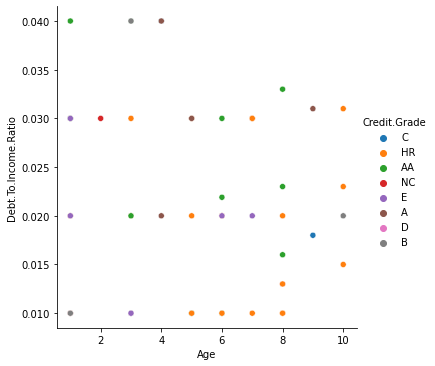

In [ ]:
sns.relplot(x='Age', y='Debt.To.Income.Ratio', hue='Credit.Grade', data=df)

"Debt.To.Income.Rate" across "Age" scatter plot isn't able to provide us any kind of proper insight as we can see the data point are fairly spread over and "Credit.Grade" is also not able to segregate the data points at all.

### **Categorical Values Analysis**

As we have seen earlier that analysis on "Status" will not provide us any insight, we will go ahead and try to explore "Credit.Grade" across different numerical parameters.

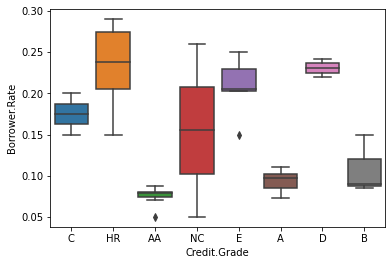

In [ ]:
sns.boxplot(x=df['Credit.Grade'], y=df['Borrower.Rate'])
mean = round(df['Age'].mean(), 1)
sd = round(df['Age'].std(), 1)
median =round(df['Age'].median(), 1)

With the help of above box plot, we can clearly say that, for "Borrower.Rate" across different "Credit.Grade" --- AA < A < B < C < (D or E) < HR. The comparitive relation between "Credit.Grade" D & E is kind of vague and we need more datapoints to comment anything in confidence. 

As for the reason stated earlier, any comments on "Credit.Grade" - NC, has been avoided.

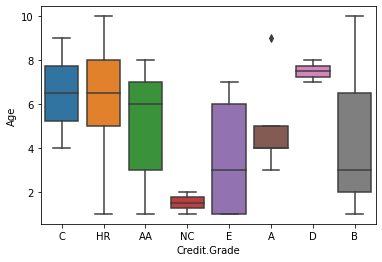

In [ ]:
sns.boxplot(x=df['Credit.Grade'], y=df['Age'])

No concrete insight can be obtained from the above as the "Age" is fairly spread over different "Credit.Grade".

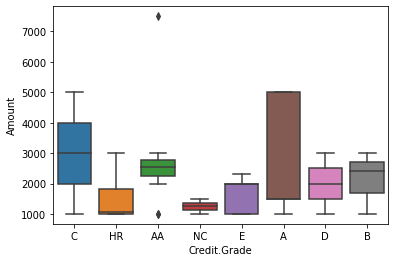

In [ ]:
sns.boxplot(x=df['Credit.Grade'], y=df['Amount'])

Same as previous analysis, no concrete insight can be obtained from above box plot for "Amount" across different "Credit.Grade". Although we can see that, only "Credit.Grade" - AA contains outlier which has a count of 2.